# THE DEFINITIVE DIAMOND BUYING GUIDE

***Data Description***

*Her are the things you need to know before to start exploring the dataset.*


**CARAT:**
Based on Tavernier's law  the price of a diamond increases along with its size. Larger gemstones are rarer and go up rapidly in price. Diamonds of 25 carats and more usually have their own names. The bigger the diamond, the more it costs. While this is not entirely wrong, it’s not entirely right, either. The size or carat weight of a diamond is only one factor in calculating the value of the diamond.

**CUT:**
We often think of a diamond’s cut as shape (round, heart, oval, marquise, pear), but a diamond’s cut grade is really about how well a diamond’s facets interact with light. The cut is the most important factor in a diamond's brilliance

**COLOR:**
The diamond color evaluation of most gem-quality diamonds is based on the absence of color. A chemically pure and structurally perfect diamond has no hue, like a drop of pure water, and consequently, a higher value. The grades diamonds on a scale of D (colorless) through Z (light color). All D-Z diamonds are considered white, even though they contain varying degrees of color. Color becomes much harder to detect once a stone is set in a ring and placed in an environment that contains color. Color becomes more important as carat weight increases, because color is easier to perceive in a larger diamond.

**CLARITY:**
While no diamond is perfectly pure, the closer it comes, the higher its value.
- *Flawless (FL)* No inclusions and no blemishes visible under 10x magnification (Excellent)
- *Internally Flawless (IF)* No inclusions visible under 10x magnification (Excellent)
- *Very, Very Slightly Included (VVS1 and VVS2)* Inclusions so slight they are difficult for a skilled grader to see under 10x magnification (Very Good)
- *Very Slightly Included (VS1 and VS2)* Inclusions are observed with effort under 10x magnification, but can be characterized as minor (Good)
- *Slightly Included (SI1 and SI2)* Inclusions are noticeable under 10x magnification (Fair)
- *Included (I1, I2, and I3)* Inclusions are obvious under 10x magnification which may affect transparency and brilliance (Poor)

**DEPTH (%):**
The depth % of a diamond is calculated by dividing the depth by the width of the diamond. So, if a diamond is 3 mm in depth, and 4.5 mm in width, its depth % is 66.7. The lower the depth %, the larger a diamond of a given carat weight will appear (since most of the diamond's size is in its width vs. in its depth).

**TABLE (%):**
The table % of a diamond is calculated by dividing the width of the table facet by the width of the diamond. So, if the table facet is 3 mm wide, and the diamond is 4.5 mm wide, its table % is 66.7.

**PRICE:**
The price is set in US dollars 

**VOlUME (mm):**
The multiplication of the following components
- *x* = lenght in mm
- *y* = width in mm
- *z* = depth in mm


**Needed Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the data:**

In [2]:
diamonds = pd.read_csv('/home/juan/IronHack/ih_datamadpt0420_project_m2/Data/diamonds_train.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


**Info about the data**

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


**Let's check if there is any null value**

In [4]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Let's find the most important statistical measures through the describe method**

In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


**Also, we can describe the object functions**

In [6]:
diamonds.describe(include=['object'])

,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16220,8455,9749


**We discovered some zero values for the length, width, and depth, let's see where they are and drop them from the dataframe***

In [7]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1606,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
3945,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
13839,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
14815,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
14891,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
16425,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
19856,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24795,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0


In [8]:
len(diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])

16

In [9]:
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]

In [10]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


**Instead of doing the analysis of three distinct variables, we will add a new column with *VOLUME* of the diamond --> length * width * depth**

In [11]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']

In [12]:
diamonds.drop(['x','y','z'], axis=1, inplace= True)

**Before continue we are going to add two more columns**
- Color group
- Clarity group

*Like we have done with the volume, this will help us to simplify the analysis*

In [13]:
color_dict = {'D':'Colorless','E':'Colorless','F':'Colorless',
              'G':'Near Colorless','H':'Near Colorless','I':'Near Colorless','J':'Near Colorless', 
             'K':'Faint', 'L':'Faint', 'M':'Faint', 
             'N':'Very Light', 'O':'Very Light', 'P':'Very Light', 'Q':'Very Light', 'R':'Very Light',
              'S':'Light', 'T':'Light', 'U':'Light', 'V':'Light', 'W':'Light', 'X':'Light', 'Y':'Light', 'Z':'Light'}

clarity_dict = {'FL':'Excelent',
                'IF':'Excelent',
                'VVS1':'Very Good','VVS2':'Very Good',
                'VS1':'Good', 'VS2':'Good',
                'SI1':'Fair', 'SI2':'Fair',
                'I1':'Poor', 'I2':'Poor','I3':'Poor'}

In [14]:
diamonds['color_grp'] = diamonds['color'].map(color_dict)
diamonds['clarity_grp'] = diamonds['clarity'].map(clarity_dict)

In [15]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume,color_grp,clarity_grp
0,1.21,Premium,J,VS2,62.4,58.0,4268,197.096725,Near Colorless,Good
1,0.32,Very Good,H,VS2,63.0,57.0,505,52.395750,Near Colorless,Good
2,0.71,Fair,G,VS1,65.5,55.0,2686,113.436890,Near Colorless,Good
3,0.41,Good,D,SI1,63.8,56.0,738,66.268800,Colorless,Fair
4,1.02,Ideal,G,SI1,60.5,59.0,4882,168.429975,Near Colorless,Fair


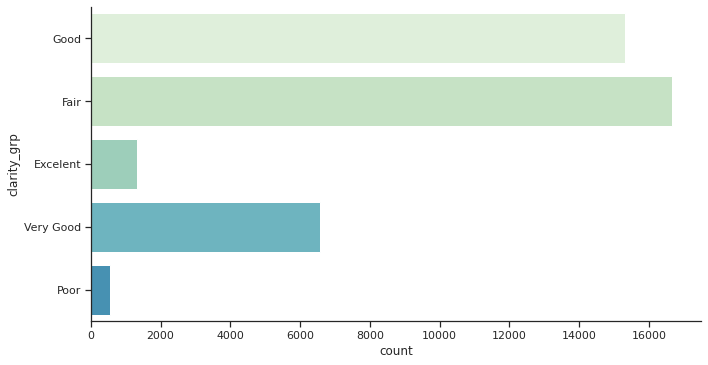

In [16]:
sns.set(style="ticks", palette='GnBu')
#info about the pallete https://loading.io/color/feature/GnBu-8/

sns.catplot(y='clarity_grp', data=diamonds, kind='count' ,aspect=2);

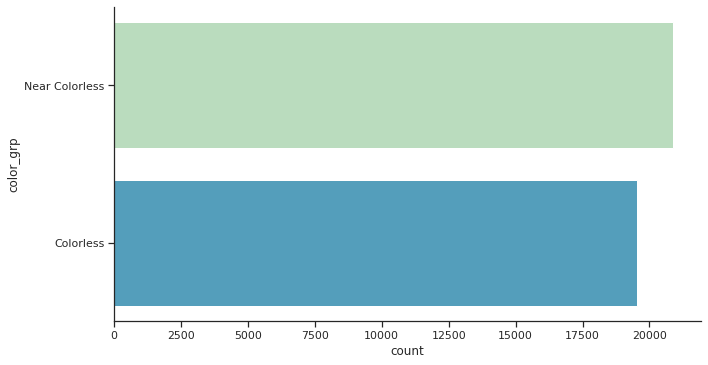

In [17]:
sns.catplot(y='color_grp', data=diamonds, kind='count',aspect=2, palette='GnBu');

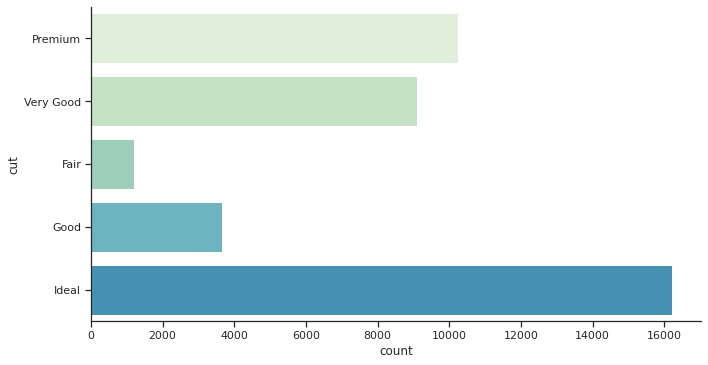

In [18]:
sns.catplot(y='cut', data=diamonds, kind='count' ,aspect=2);

**Let's do the Correlation Matrix to gather more info about diamonds and its price**

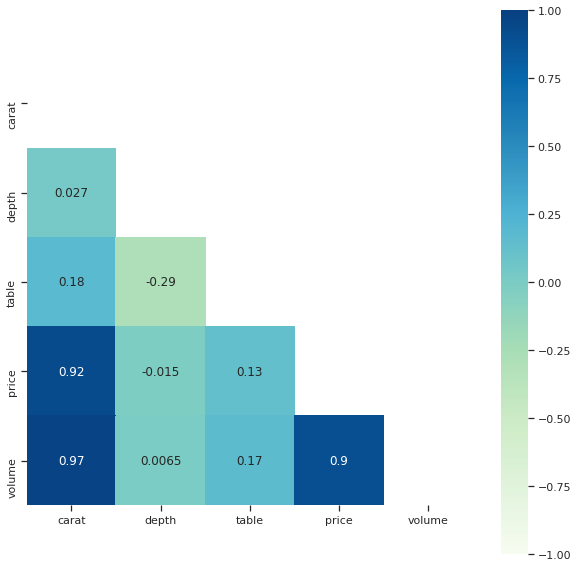

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

matrix = np.triu(diamonds.corr())
sns.heatmap(diamonds.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'GnBu',square=True,  ax=ax);

**Two important conclusions here:**
- As the carat increases, the price increases
- A strong correlation between carat and volume due to as mentioned above the carat is a unit of 'size'

*By the way, be careful about correlations:* https://www.tylervigen.com/spurious-correlations ;)

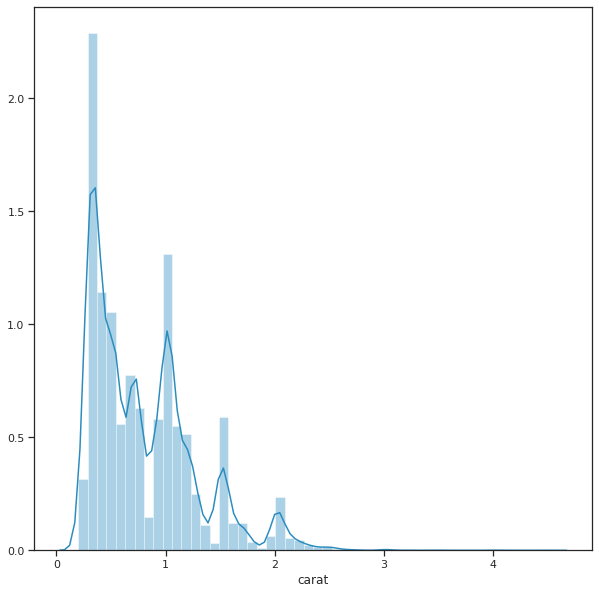

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

sns.distplot(diamonds['carat'], color='#2b8cbe');

**Above the histogram of the carat column that show us that as larger the diamond is, the more increasingly rare it is, that's why its price increases**

Let's see in a closer way the relation between price and carat

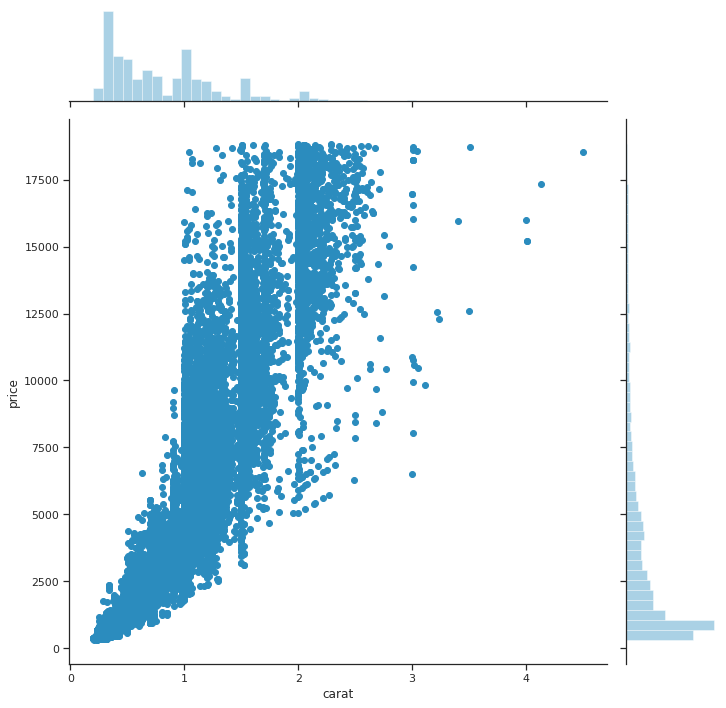

In [21]:
sns.jointplot(x='carat', y='price' , data=diamonds, height=10,color='#2b8cbe');

Diamonds below 1 carat tend to have a small difference between the highest and the lowest price, that difference increases as the carat increases, so more factors to have into account. Let's classified the carat column into bins.

In [22]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

diamonds['carat_bnd'] = pd.cut(diamonds['carat'], bins)

Once the carat has been divided in bins, let see by boxploting different aspects of diamonds: carat bins, clarity, color and cut:

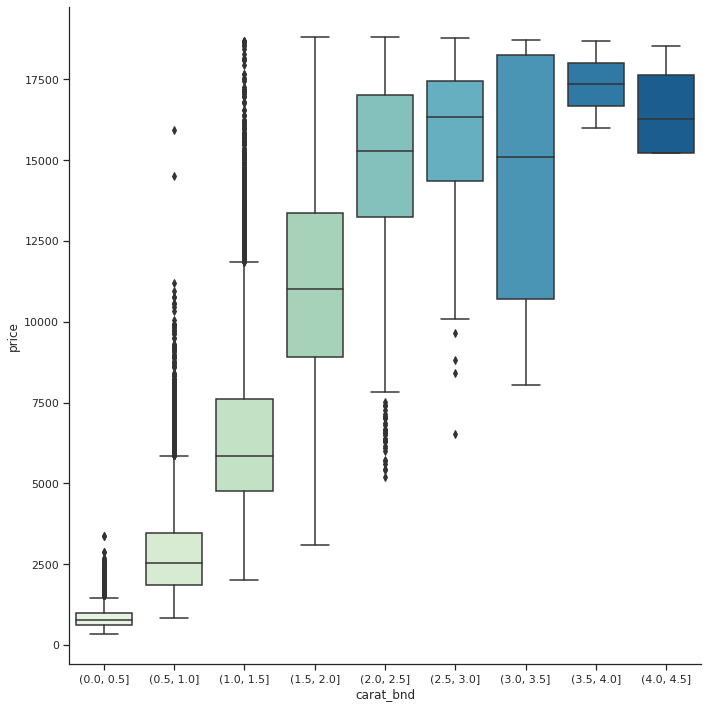

In [23]:
sns.catplot(x='carat_bnd', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

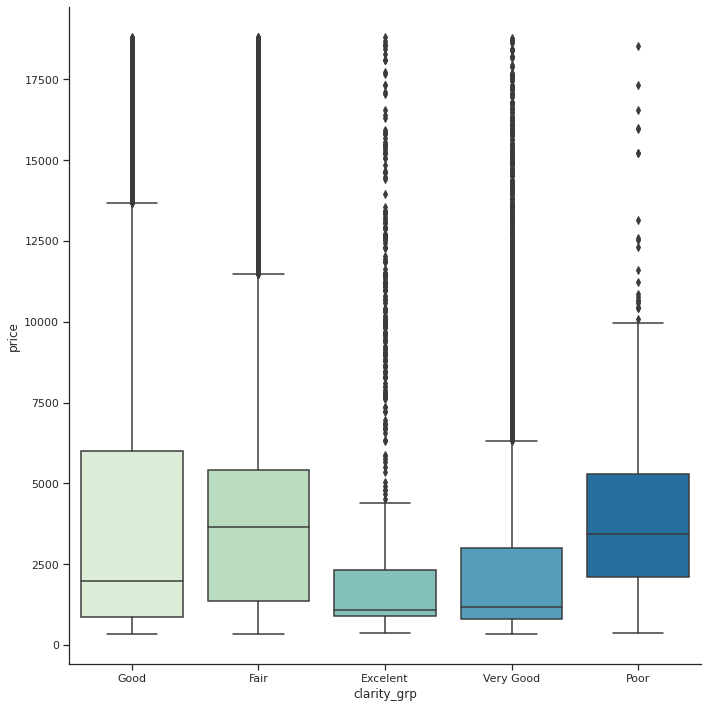

In [24]:
sns.catplot(x='clarity_grp', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

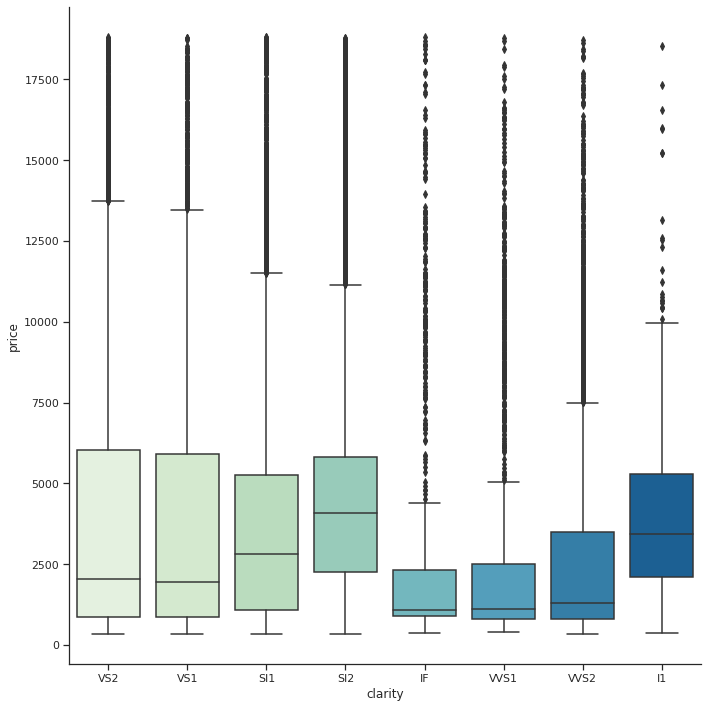

In [25]:
sns.catplot(x='clarity', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

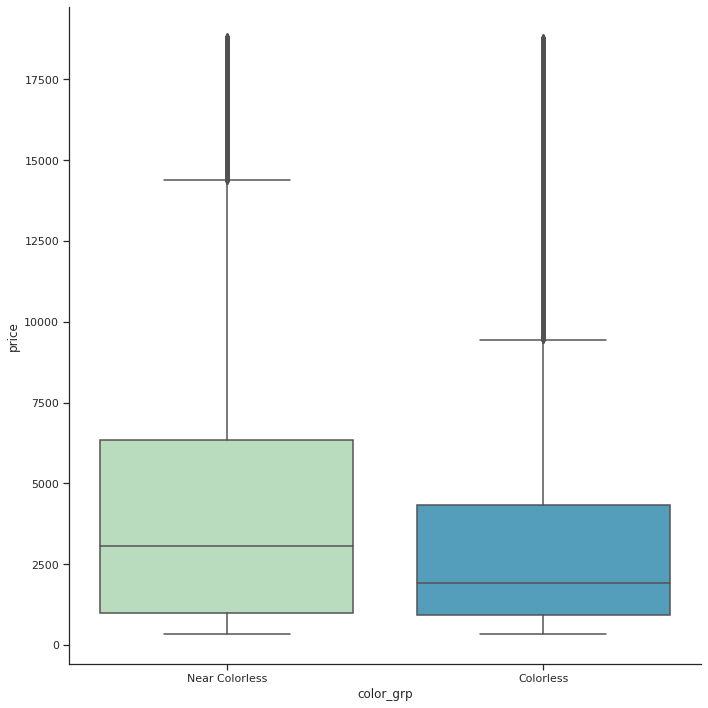

In [26]:
sns.catplot(x='color_grp', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

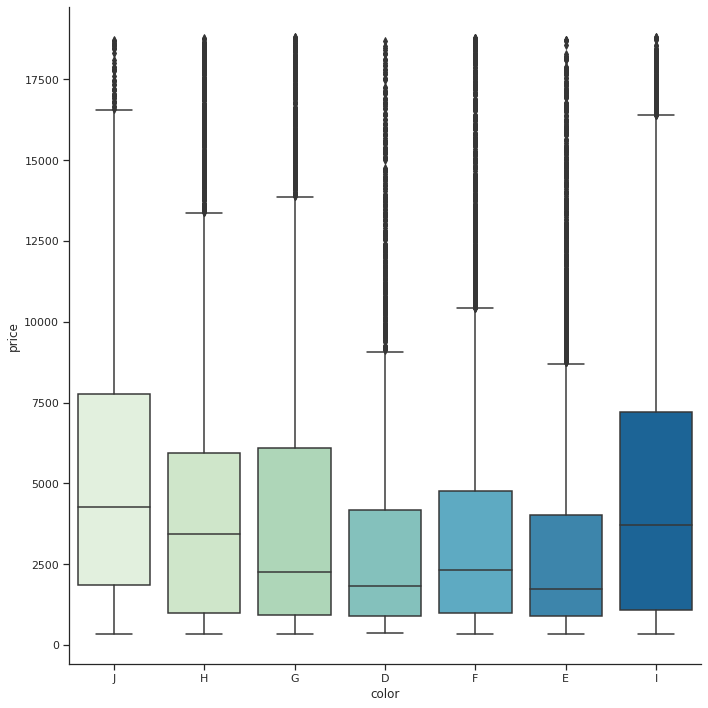

In [27]:
sns.catplot(x='color', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

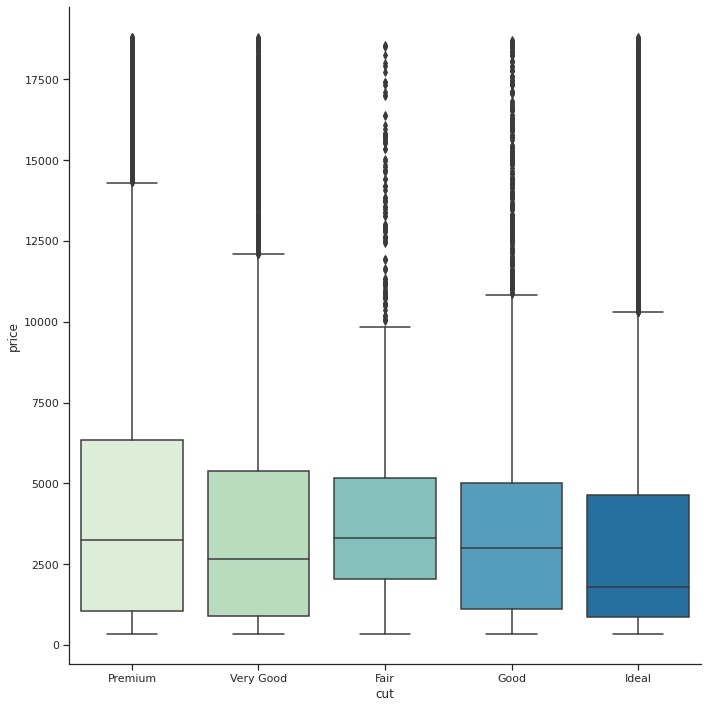

In [28]:
sns.catplot(x='cut', y='price', kind='box', data=diamonds, height=10, palette='GnBu');

**Several aspects came after this analysis:**
- In the beginning, we thought that carat was the most important thing to watch. But as we have seen in the scatter plot: as the carat increases other factors start to count in the price of a diamond. However, why a poor clarity diamonds are more expensive, on average than an excellent one? or why a near colorless are, on average more expensive than colorless ones? The answer is carat!

In order to simplify the analisys and given the amount of small-sized (carat < 3) diamonds, let's analyze them closely: 

In [29]:
diamonds['carat_bnd'].value_counts(normalize=True)

(0.0, 0.5]    0.352828
(0.5, 1.0]    0.322189
(1.0, 1.5]    0.223522
(1.5, 2.0]    0.065976
(2.0, 2.5]    0.033112
(2.5, 3.0]    0.001731
(3.0, 3.5]    0.000495
(4.0, 4.5]    0.000099
(3.5, 4.0]    0.000049
Name: carat_bnd, dtype: float64

In [30]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

diamonds['carat_bnd'] = pd.cut(diamonds['carat'], bins, labels=range(0,9))

**Below some tables to understand the small-carat diamonds**

In [43]:
diamonds['carat_bnd'] = diamonds['carat_bnd'].apply(lambda x:x if x < 1 else None)
diamonds_small_carat = diamonds.dropna(subset=['carat_bnd'])
diamonds_small_carat.describe()

,carat,depth,table,price,volume,carat_bnd
count,14268.000000,14268.000000,14268.000000,14268.000000,14268.000000,14268.0
mean,0.354587,61.721103,56.995416,838.605551,58.290679,0.0
std,0.064611,1.183074,2.092504,309.798219,10.542523,0.0
min,0.200000,52.300000,44.000000,326.000000,32.262375,0.0
25%,0.310000,61.100000,56.000000,624.000000,50.621760,0.0
50%,0.330000,61.800000,57.000000,787.000000,55.069850,0.0
75%,0.400000,62.400000,58.000000,984.000000,66.247188,0.0
max,0.500000,79.000000,73.000000,3378.000000,127.767024,0.0


In [44]:
columns_to_show = ['price', 'carat']
diamonds_small_carat.groupby(['cut'])[columns_to_show].agg([np.count_nonzero, np.mean, np.std, np.min, np.max])

price                                             carat  \
          count_nonzero         mean         std amin  amax count_nonzero   
cut                                                                         
Fair                143  1030.006993  371.056324  337  2579         143.0   
Good               1045   775.003828  342.173101  327  3378        1045.0   
Ideal              6942   863.919476  299.977594  326  2889        6942.0   
Premium            3208   862.008105  285.858521  326  2525        3208.0   
Very Good          2930   766.349147  325.256214  337  3378        2930.0   

                                          
               mean       std  amin amax  
cut                                       
Fair       0.426573  0.083986  0.22  0.5  
Good       0.366670  0.075315  0.23  0.5  
Ideal      0.351914  0.057745  0.20  0.5  
Premium    0.360181  0.060894  0.20  0.5  
Very Good  0.346973  0.074792  0.21  0.5

In [45]:
diamonds_small_carat.groupby(['clarity_grp'])[columns_to_show].agg([np.count_nonzero, np.mean,np.median, np.std, np.min, np.max])

price                                             \
            count_nonzero         mean median         std amin  amax   
clarity_grp                                                            
Excelent              939  1021.624068  954.0  315.508643  369  3378   
Fair                 3481   720.193335  678.0  240.849591  326  1857   
Good                 5864   823.747101  773.0  292.749210  327  2579   
Poor                   38   657.578947  606.5  307.325748  361  2160   
Very Good            3946   923.336290  863.0  340.332434  354  2889   

                    carat                                        
            count_nonzero      mean median       std  amin amax  
clarity_grp                                                      
Excelent            939.0  0.338946   0.32  0.051983  0.23  0.5  
Fair               3481.0  0.373433   0.36  0.064075  0.20  0.5  
Good               5864.0  0.355056   0.33  0.062971  0.20  0.5  
Poor                 38.0  0.417368   0.41  0.072473  0.30  0.5  
Very Good          3946.0  0.340383   0.32  0.065411  0.23  0.5

In [46]:
diamonds_small_carat.groupby(['color_grp'])[columns_to_show].agg([np.count_nonzero, np.mean,np.median, np.std, np.min, np.max])

price                                            \
               count_nonzero        mean median         std amin  amax   
color_grp                                                                
Colorless               7987  890.381119    830  324.024350  326  3378   
Near Colorless          6281  772.767075    720  277.090479  334  2506   

                       carat                                        
               count_nonzero      mean median       std  amin amax  
color_grp                                                           
Colorless             7987.0  0.356254   0.34  0.068246  0.20  0.5  
Near Colorless        6281.0  0.352468   0.33  0.059606  0.23  0.5

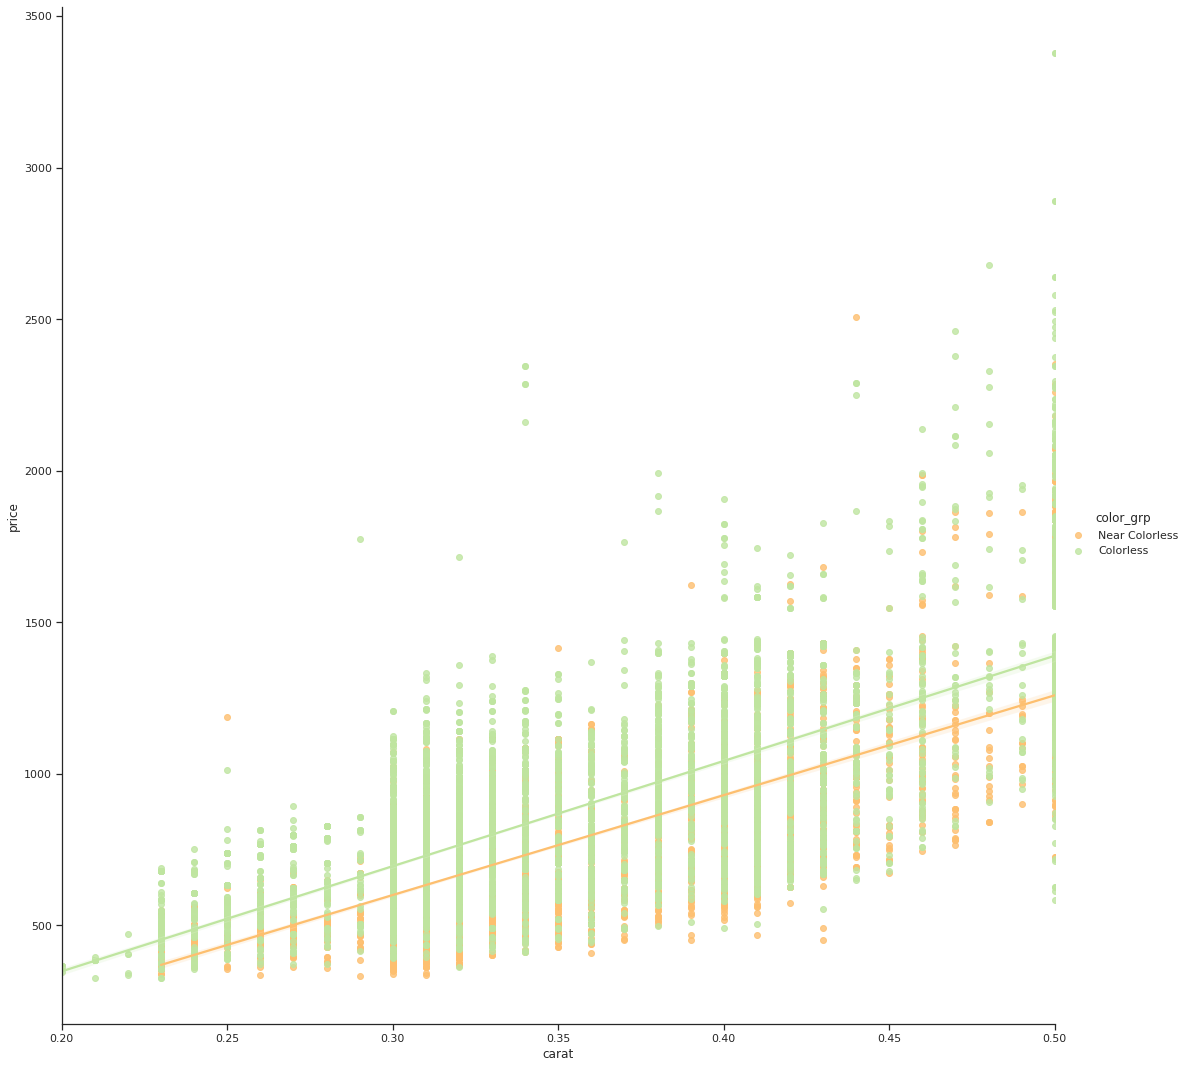

In [47]:
sns.lmplot(x='carat', y='price', data=diamonds_small_carat,hue='color_grp',height=15, palette='Spectral'); 

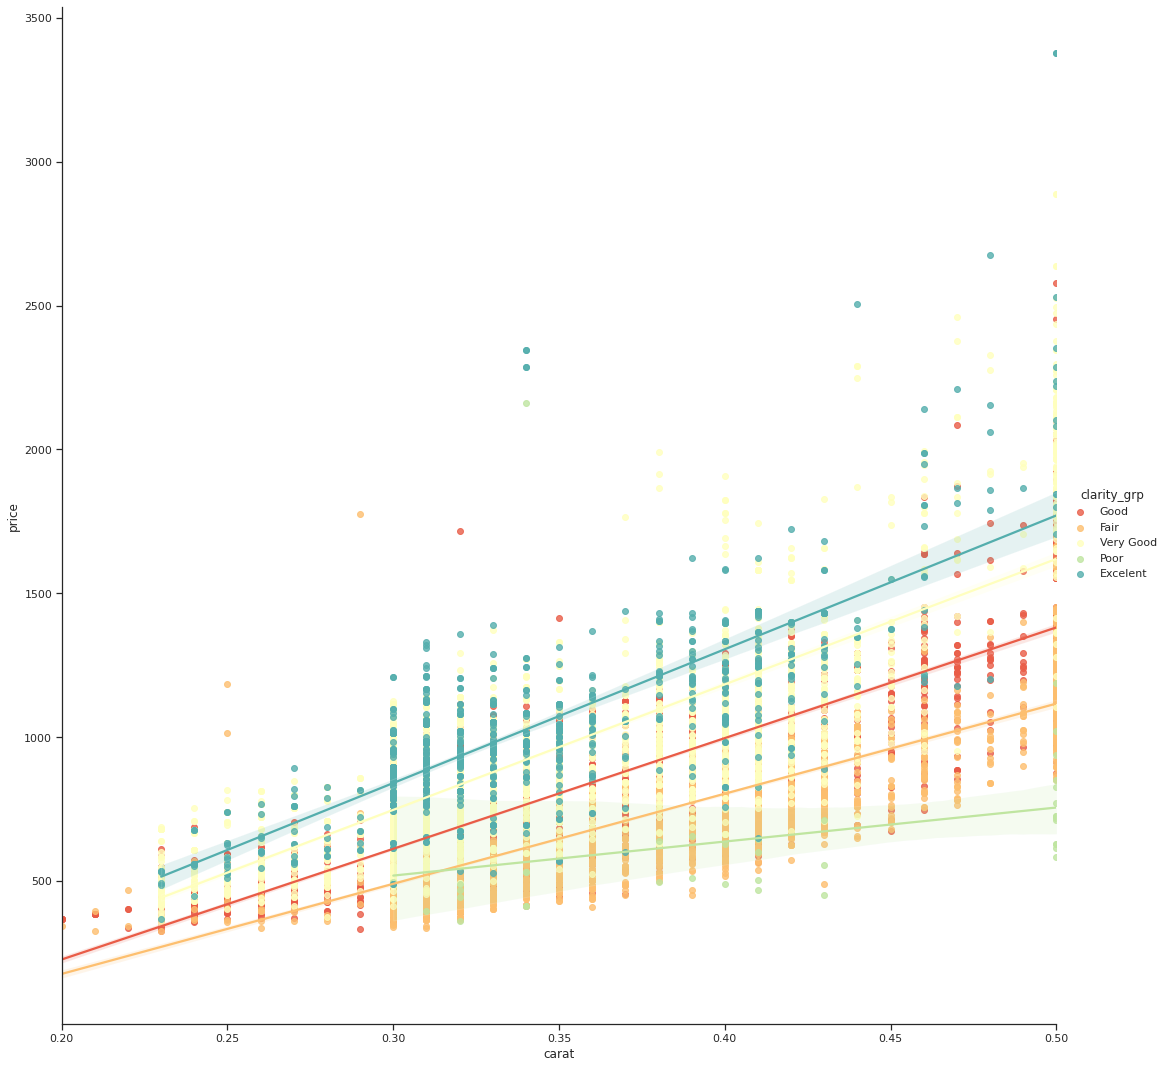

In [48]:
sns.lmplot(x='carat', y='price', data=diamonds_small_carat, hue='clarity_grp', height=15, palette='Spectral');

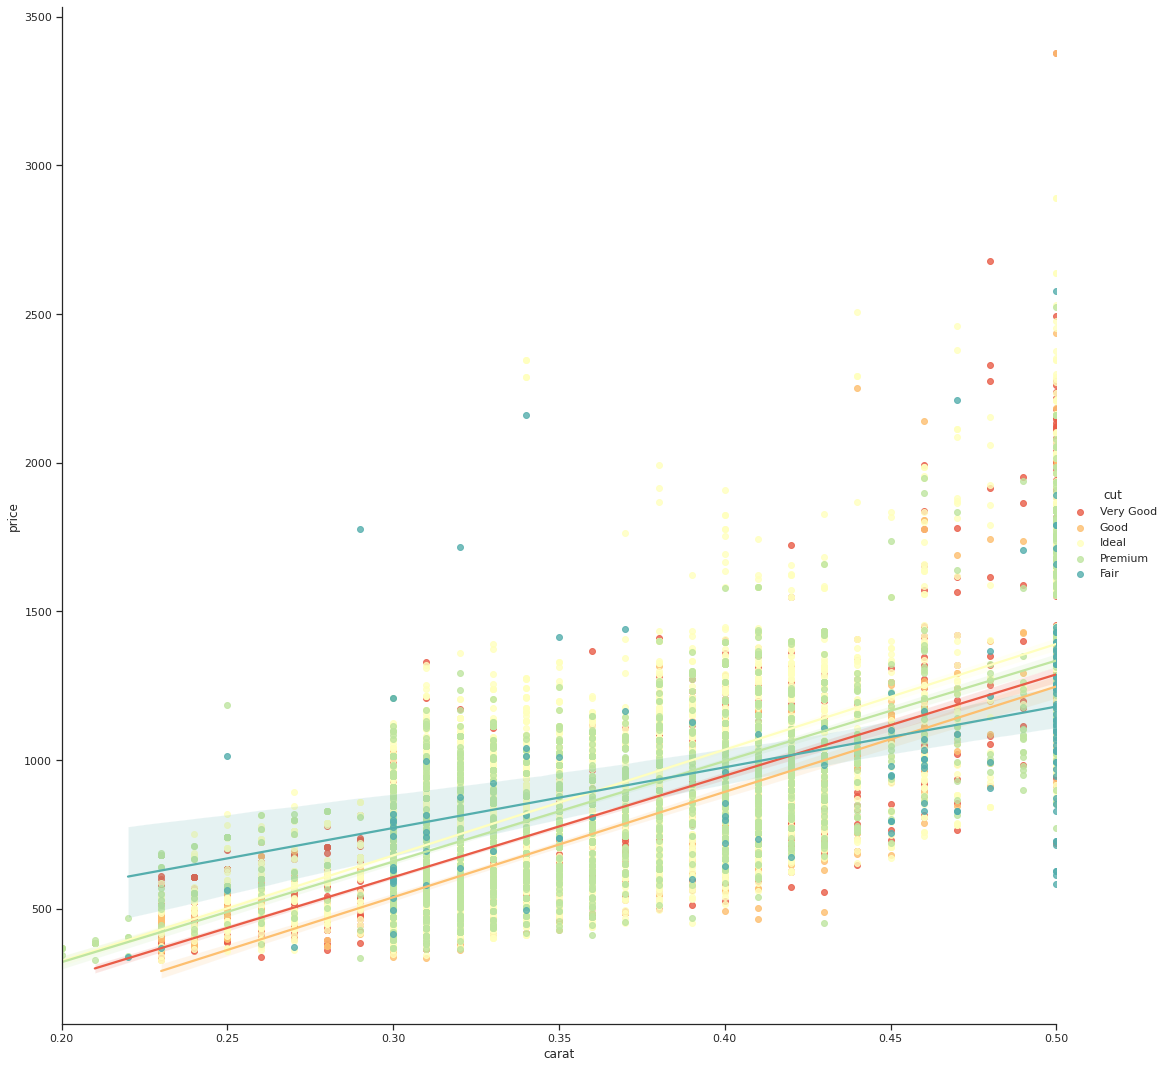

In [49]:
sns.lmplot(x='carat', y='price', data=diamonds_small_carat, hue='cut', height=15, palette='Spectral');

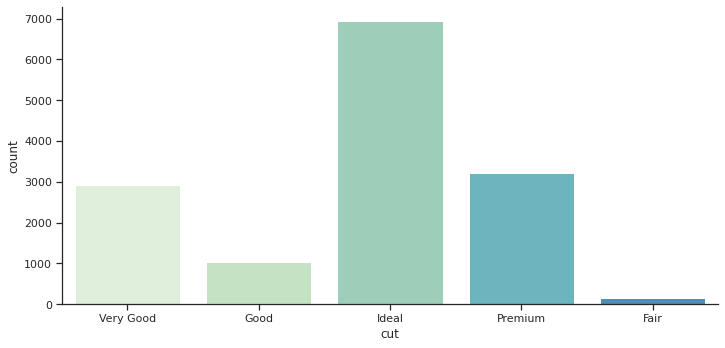

In [50]:
sns.catplot(x='cut', data=diamonds_small_carat, kind='count' ,aspect=2);

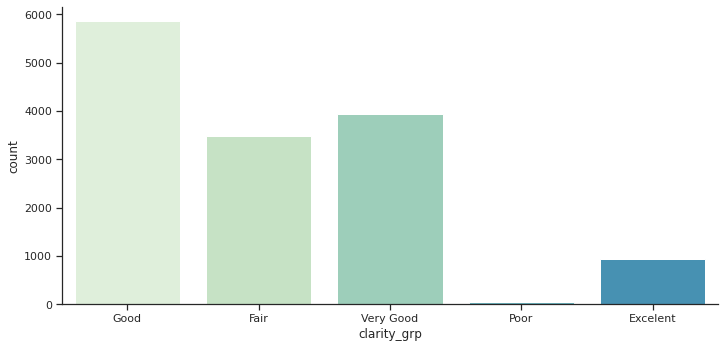

In [51]:
sns.catplot(x='clarity_grp', data=diamonds_small_carat, kind='count' ,aspect=2);

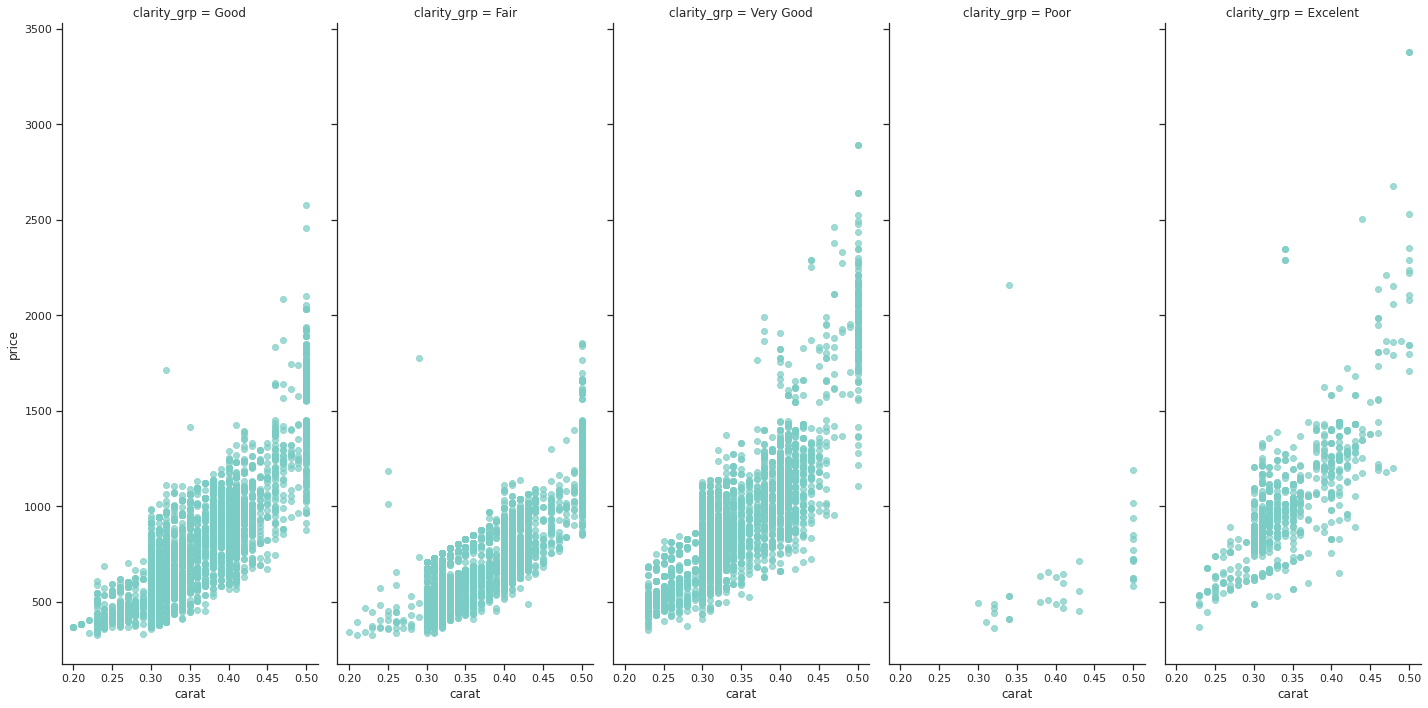

In [59]:
g = sns.FacetGrid(diamonds_small_carat, col="clarity_grp",  palette='GnBu', aspect=0.4, height=10)
g.map(plt.scatter,  'carat',"price", alpha=.7, color='#7bccc4');

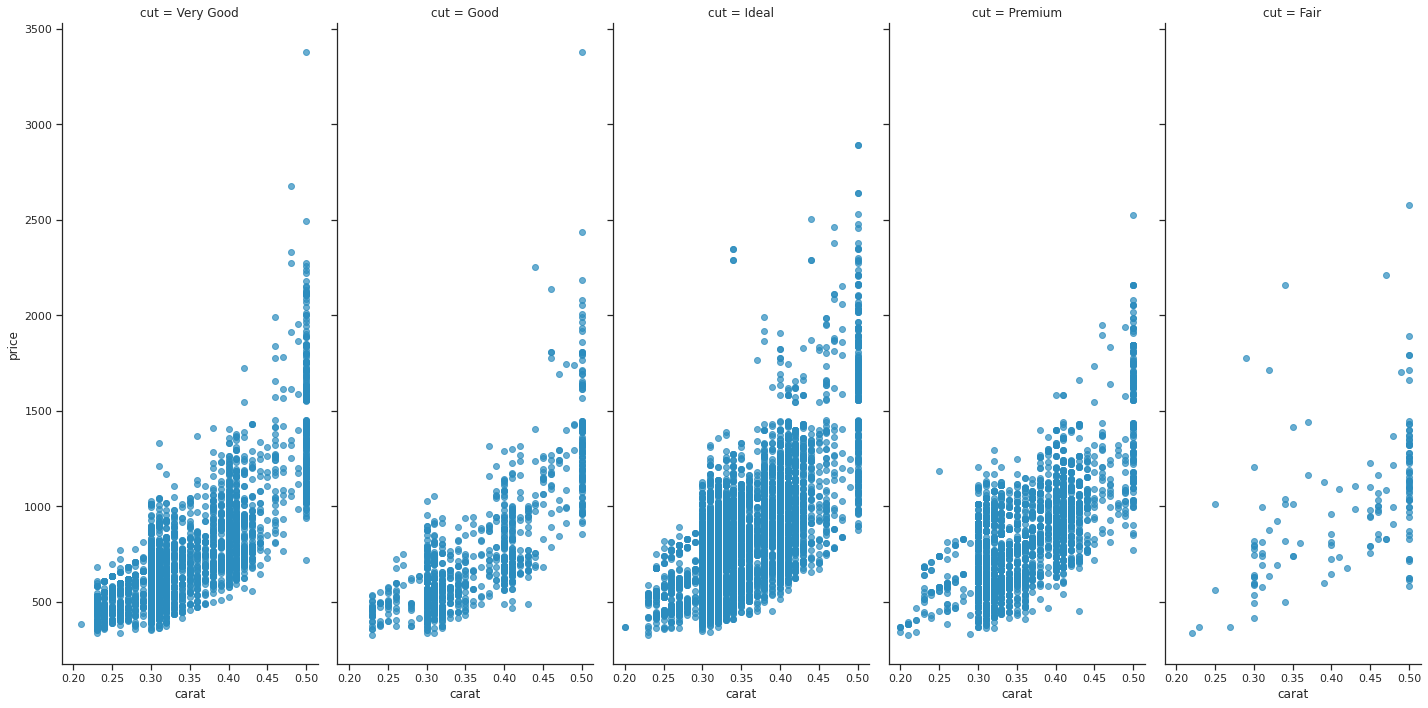

In [58]:
g = sns.FacetGrid(diamonds_small_carat, col='cut', palette='GnBu', aspect=0.4, height=10)
g.map(plt.scatter,  'carat',"price", alpha=.7, color='#2b8cbe');

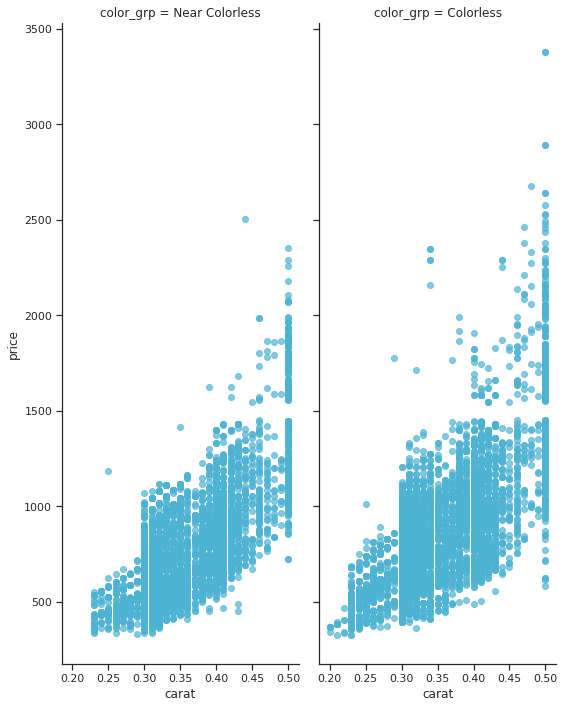

In [57]:
g = sns.FacetGrid(diamonds_small_carat, col="color_grp", palette='GnBu', aspect=0.4, height=10)
g.map(plt.scatter,  'carat',"price", alpha=.7, color='#4eb3d3');

Observing the above graphs we conclude that to establish a fair price for a diamond the first thing you have to do is compare the diamond with its carat-peers, in order to arrive at a clear conclusion about the factors that help to form its price. 